<a href="https://colab.research.google.com/github/hebatoallah-yehya1111/Fake_OR_Real/blob/main/Core_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Dependencies

In [ ]:
import pandas as pd
import string
import nltk
from tensorflow import keras 
import sklearn
#import time
from keras.models import Sequential
from keras.layers import Dense
import numpy
import tensorflow as tf
import numpy as np
#from time import time
#from nltk.corpus import stopwords
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import TensorBoard
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout
import keras.preprocessing.text
from keras.models import load_model
import seaborn as sns
from sklearn.model_selection import train_test_split



# Check Tensorflow Version

In [ ]:
print(tf.__version__)


2.9.2


# Loading the dataset 

In [ ]:
# load dataset
df = pd.read_csv("final_DF.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)

df

,Full Name,Label
0,حدبل جتآختعبدتئثمابف,Fake
1,بفشق عاؤتةناجظ,Fake
2,طيب مبارك كنان,Real
3,حجثج فلالأيرزشن,Fake
4,امئا تيو وهابب,Fake
...,...,...
5995,هاشم سنان جمعه,Real
5996,عزب بكري البراء,Real
5997,كنزي عبداللطيف كرم,Real
5998,ثكيبه لبابضءنالخ,Fake


# Train Test Split before training

In [ ]:
Names= df['Full Name']
Labels = df['Label']


Names_train, Names_test, Labels_train, Labels_test = train_test_split(Names, Labels, test_size=0.2, random_state=42,shuffle=False)


print(f"Full Data Size ===> {len(Names)}")
print(f"Traning Data Size ===> {len(Names_train)}")
print(f"Testing Data Size ===> {len(Names_test)}")




Full Data Size ===> 6000
Traning Data Size ===> 4800
Testing Data Size ===> 1200


# Toknizing the text

Converts a list of sequences into a Numpy matrix.



In [ ]:
tokenizer = Tokenizer(num_words=None,lower=False)
tokenizer.fit_on_texts(Names)
print(tokenizer)

x_train = tokenizer.texts_to_matrix(Names_train, mode='tfidf')
x_test = tokenizer.texts_to_matrix(Names_test, mode='tfidf')



# Mapping the classes form categorical to numerical using LabelEncoder()

In [ ]:
encoder = LabelEncoder()
encoder.fit(Labels)
tagst=encoder.fit_transform(Labels)

num_classes = int((len(set(tagst))))
print(f"Number of classes ===>{(len(set(tagst)))}")

y_train = encoder.fit_transform(Labels_train)
y_test = encoder.fit_transform(Labels_test)



Number of classes ===>2


# utils.to_categorical
This function returns a matrix of binary values (either ‘1’ or ‘0’). It has number of rows equal to the length of the input vector and number of columns equal to the number of classes.

In [ ]:
y_train= keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


num_labels = int(len(y_train.shape))
vocab_size = len(tokenizer.word_index) + 1

max_words=vocab_size

y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

# This fuction to calculate f1_metric 

In [ ]:
import keras.backend as K
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

from keras.metrics import Precision , Recall , Accuracy , TruePositives , TrueNegatives , FalsePositives , FalseNegatives

# Building a model 

In [ ]:
# Build the model
model = Sequential()
model.add(Dense(1024, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

# Configures the model for training.



In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy','Recall','Precision', f1_metric,'TruePositives','TrueNegatives','FalsePositives','FalseNegatives'])

# Training the model 

In [ ]:
batch_size = 100
epochs = 2

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)


Epoch 1/2
44/44 [==============================] - 7s 112ms/step - loss: 0.5309 - categorical_accuracy: 0.7650 - recall: 0.7787 - precision: 0.7157 - f1_metric: 0.7488 - true_positives: 3364.0000 - true_negatives: 2984.0000 - false_positives: 1336.0000 - false_negatives: 956.0000 - val_loss: 0.3241 - val_categorical_accuracy: 0.9167 - val_recall: 0.9438 - val_precision: 0.8882 - val_f1_metric: 0.9160 - val_true_positives: 453.0000 - val_true_negatives: 423.0000 - val_false_positives: 57.0000 - val_false_negatives: 27.0000
Epoch 2/2
44/44 [==============================] - 4s 86ms/step - loss: 0.0832 - categorical_accuracy: 0.9889 - recall: 0.9910 - precision: 0.9835 - f1_metric: 0.9874 - true_positives: 4281.0000 - true_negatives: 4248.0000 - false_positives: 72.0000 - false_negatives: 39.0000 - val_loss: 0.2009 - val_categorical_accuracy: 0.9354 - val_recall: 0.9521 - val_precision: 0.9195 - val_f1_metric: 0.9361 - val_true_positives: 457.0000 - val_true_negatives: 440.0000 - val_fals

# Saving the model

In [ ]:
model.save('my_model.h5')


# Saving and Loading tokenizer

In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Evaluate Model Performance On Testing Dataset

In [ ]:
my_model = load_model('my_model.h5',custom_objects={'f1_metric':f1_metric})
Evaluation_valus = model.evaluate(x_test,y_test,verbose=0)
print("Loss" , 'categorical_accuracy','Recall','Precision','f1_metric','TruePositives','TrueNegatives','FalsePositives','FalseNegatives')

print(Evaluation_valus)

Loss categorical_accuracy Recall Precision f1_metric TruePositives TrueNegatives FalsePositives FalseNegatives
[0.17038626968860626, 0.9466666579246521, 0.9474999904632568, 0.9396694302558899, 0.9434808492660522, 1137.0, 1127.0, 73.0, 63.0]


# Show the predictions of the model on Testing Dataset

In [ ]:
for x in df["Full Name"][len(Names_train):]:

    tokens = tokenizer.texts_to_matrix([x], mode='tfidf')


    predict_x=model.predict(np.array(tokens)) 
    c=np.argmax(predict_x,axis=1)
    xc = encoder.inverse_transform(c)


    print(x,"= \t",xc)

1/1 [==============================] - 0s 85ms/step
سؤمر قثة ساخي = 	 ['Fake']
1/1 [==============================] - 0s 23ms/step
باأع عكآ لإهح = 	 ['Fake']
1/1 [==============================] - 0s 21ms/step
مصلحه خضر كاسر = 	 ['Fake']
1/1 [==============================] - 0s 23ms/step
فهئيهجرهدمشسبسة = 	 ['Fake']
1/1 [==============================] - 0s 20ms/step
مبروكه فاخر شكور = 	 ['Real']
1/1 [==============================] - 0s 21ms/step
رؤي عمار ساجر = 	 ['Real']
1/1 [==============================] - 0s 25ms/step
مكين ذعار درغام = 	 ['Real']
1/1 [==============================] - 0s 23ms/step
فهد مدثر تواب = 	 ['Real']
1/1 [==============================] - 0s 23ms/step
امف ميمون خزعل = 	 ['Real']
1/1 [==============================] - 0s 21ms/step
هياء هجنح إهاب = 	 ['Fake']
1/1 [==============================] - 0s 21ms/step
اويت معتجق ناصر = 	 ['Fake']
1/1 [==============================] - 0s 27ms/step
منصور ربيح عبوده = 	 ['Real']
1/1 [==============================] 

# Checking threshold 

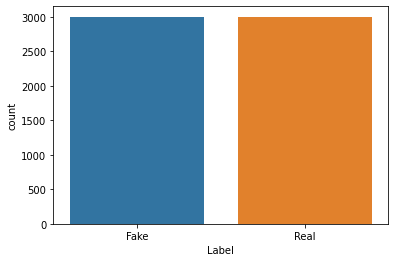

In [ ]:
sns.countplot(x=df["Label"])

As we notice the dataset is balanced so we choose 0.5 as a threshold 

In [ ]:
def predict_pipeLine(Test_name):

    tokens = tokenizer.texts_to_matrix([Test_name], mode='tfidf')
    predict_x=model.predict(np.array(tokens))
    c=np.argmax(predict_x,axis=1)
    xc = encoder.inverse_transform(c)
    print(predict_x)
    if predict_x[0][1]> 0.5 and abs(predict_x[0][1]-predict_x[0][0])>0.1 :
        return("True Name with High Confidence")
    elif predict_x[0][1]> 0.5 and abs(predict_x[0][1]-predict_x[0][0])<0.1 :
        return ("True Name with Low Confidence")
    else:
        return ("False Name")


In [ ]:
predict_pipeLine("باسم وحيد سيد")

1/1 [==============================] - 0s 23ms/step
[[0.4167077 0.5492734]]


'True Name with High Confidence'

In [ ]:
predict_pipeLine("مرشد عزيؤ ماجد")

1/1 [==============================] - 0s 22ms/step
[[0.50684875 0.5007238 ]]


'True Name with Low Confidence'

In [ ]:
predict_pipeLine("مرشد عزيز ماجد")

1/1 [==============================] - 0s 21ms/step
[[0.4757698 0.5977679]]


'True Name with High Confidence'

In [ ]:
predict_pipeLine("مرشز عزيؤ ماد")

1/1 [==============================] - 0s 22ms/step
[[0.6905689  0.30281332]]


'False Name'